# SARIMA General Model

#### [1. Loading Libraries](#1)
#### [2. Reading the Dataset](#2)
#### [3. City and Districts Dataset](#3)
#### [4. Error Trend Seasonality](#4)
#### [5. Pyramid ARIMA](#5)
#### [6. Train Test Split](#6)
#### [7. SARIMA Model](#7)
#### [8. Predictions](#8)
#### [9. Plotting the Predictions](#9)
#### [10. Evaluating the Model](#10)
#### [11. Forecasting for Future Data](#11)

### 1. Loading Libraries <a id='1'></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# To avoid seeing warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Reading the Dataset <a id='2'></a>

- DC_Dist:             District 	A two character field that names the District boundary. 	                        Text
- DC_Key:              DC Number 	The unique identifier of the crime that consists of Year + District + Unique ID. 	Text
- Dispatch_Date_Time:  Dispatch Date/Time 	The date and time that the officer was dispatched to the scene. 	        Date/Time
- Hour:          	   The generalized hour of the dispatched time. 	                                                Date/Time
- Location_Block: 	   Location Block 	The location of crime generalized by street block. 	                            Text
- Sector:    	       PSA 	A single character field that names the Police Service Area boundary. 	                    Text
- Text_General_Code:   General Crime Category 	The generalized text for the crime code. 	                            Text
- UCR_General: 	       UCR Code 	The rounded crime code, i.e. 614 to 600.


In [3]:
path = '../data/CSV/'
file = 'city_districts.csv'

In [4]:
df = pd.read_csv(path+file,index_col='dispatch_date',parse_dates=True)
df.index.freq = 'M'

In [5]:
df.head()

,city,dist_1,dist_2,dist_18,dist_77,dist_3,dist_5,dist_6,dist_14,dist_17,dist_7,dist_8,dist_9,dist_16,dist_15,dist_22,dist_24,dist_12,dist_19,dist_35,dist_25,dist_26,dist_39
dispatch_date,,,,,,,,,,,,,,,,,,,,,,,
2006-01-31,19359,512,794,898,62,468,290,899,1134,642,362,681,638,568,1410,804,1341,1126,1066,1188,1532,701,910
2006-02-28,15894,385,712,676,52,444,283,723,830,572,325,654,518,440,1205,649,1027,863,894,1003,1352,572,662
2006-03-31,18627,561,817,771,61,533,257,777,1008,664,335,623,683,607,1368,741,1306,1076,954,1111,1678,659,792
2006-04-30,18940,466,922,843,49,565,282,759,1025,766,389,598,657,594,1367,767,1325,1126,941,1126,1578,776,721
2006-05-31,20041,458,1029,918,62,509,259,867,1100,778,428,664,747,648,1391,837,1259,1164,1038,1242,1642,796,833


In [6]:
df.isnull().sum()

city       0
dist_1     0
dist_2     0
dist_18    0
dist_77    0
dist_3     0
dist_5     0
dist_6     0
dist_14    0
dist_17    0
dist_7     0
dist_8     0
dist_9     0
dist_16    0
dist_15    0
dist_22    0
dist_24    0
dist_12    0
dist_19    0
dist_35    0
dist_25    0
dist_26    0
dist_39    0
dtype: int64

### 3. City and Districts Dataset <a id='3'></a>

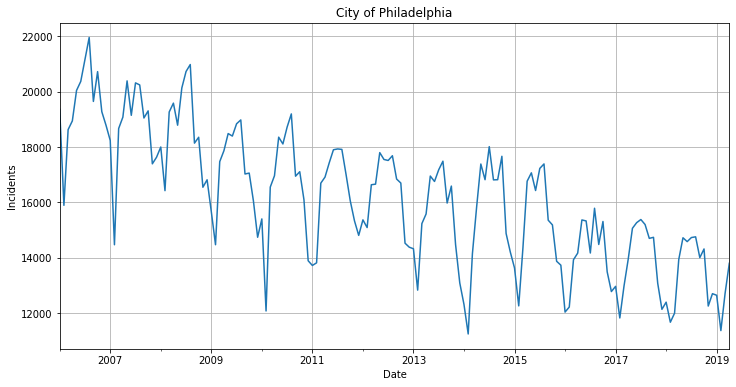

In [6]:
ax = df['city'].plot(figsize=(12,6),grid=True)
ax.set(xlabel='Date',ylabel='Incidents',title='City of Philadelphia');

### 4. Error Trend Seasonality <a id='4'></a>

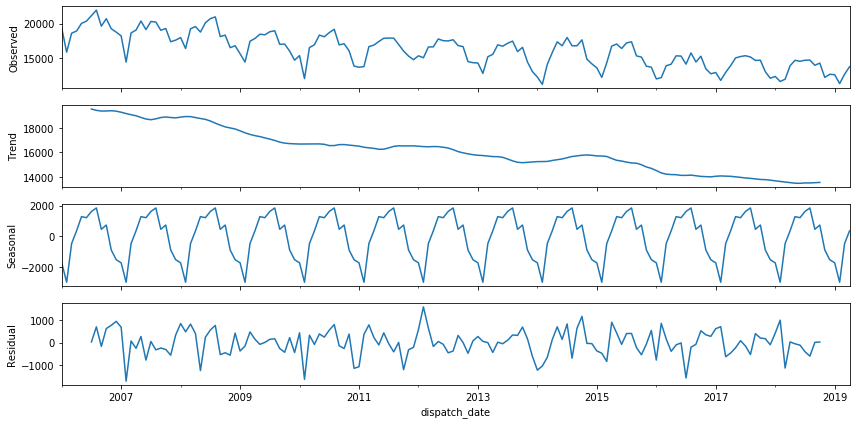

In [7]:
# model = 'additive' 'multiplicative'
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['city'],model='add')
from pylab import rcParams
rcParams['figure.figsize'] = 12,6
result.plot(); 

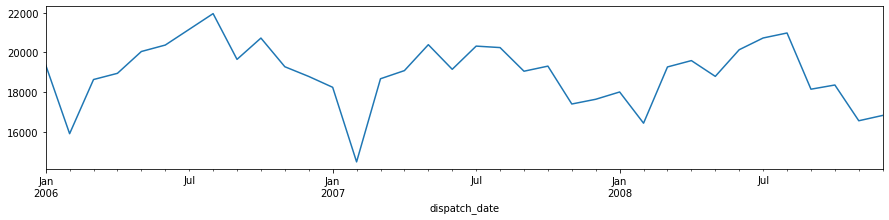

In [8]:
# Trying to know what kind of seasonality we have
df['city'].iloc[:36].plot(figsize=(15,3));

___Yearly Seasonality___

### 5. Pyramid ARIMA <a id='5'></a>

In [10]:
# Non Stationary Dataset
from pmdarima import auto_arima
# In this case the dataset has seasonality and m is every year = 12
stepwise_fit = auto_arima(df['city'],seasonal=True,trace=False,m=12)
print(stepwise_fit)
# Best Model
stepwise_fit.summary()

/home/eduardo/.local/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/ba

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 0, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  160
Model:             SARIMAX(1, 1, 0)x(2, 0, 1, 12)   Log Likelihood               -1306.136
Date:                            Sun, 19 May 2019   AIC                           2624.272
Time:                                    22:56:50   BIC                           2642.685
Sample:                                         0   HQIC                          2631.749
                                            - 160                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -31.0900     18.459     -1.684      0.092     -67.269       5.089
ar.L1         -0.2757      0.037     -7.459      0.000      -0.348      -0.203
ar.S.L12       1.0475      0.072     14.596      0.000       0.907       1.188
ar.S.L24      -0.0624      0.069     -0.910      0.363      -0.197       0.072
ma.S.L12      -0.8732      0.043    -20.516      0.000      -0.957      -0.790
sigma2      6.327e+05      0.001   6.68e+08      0.000    6.33e+05    6.33e+05
===================================================================================
Ljung-Box (Q):                       46.38   Jarque-Bera (JB):                10.54
Prob(Q):                              0.23   Prob(JB):                         0.01
Heteroskedasticity (H):               0.38   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.65e+25. Standard errors may be unstable.
"""

In [21]:
# Order
stepwise_fit.order

(1, 1, 0)

In [18]:
# Seasonal Order
stepwise_fit.seasonal_order

(2, 0, 1, 12)

### 6. Train Test Split <a id='6'></a>

In [22]:
len(df)

160

In [23]:
# One year for testing
train = df.iloc[:148]
test = df.iloc[148:]

### 7. SARIMA Model <a id='7'></a>

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['city'],order=(1,1,0),seasonal_order=(1, 0, 1, 12)) # enforce_invertibility=False
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               city   No. Observations:                  148
Model:             SARIMAX(1, 1, 0)x(1, 0, 1, 12)   Log Likelihood               -1219.538
Date:                            Sun, 19 May 2019   AIC                           2447.077
Time:                                    23:00:25   BIC                           2459.038
Sample:                                01-31-2006   HQIC                          2451.937
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2699      0.040     -6.703      0.000      -0.349      -0.191
ar.S.L12       0.9380      0.030     30.794      0.000       0.878       0.998
ma.S.L12      -0.7401      0.066    -11.169      0.000      -0.870      -0.610
sigma2      7.308e+05   7.97e+04      9.170      0.000    5.75e+05    8.87e+05
===================================================================================
Ljung-Box (Q):                       71.00   Jarque-Bera (JB):                27.97
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 8. Predictions <a id='8'></a>

In [25]:
start = len(train)
end = len(train) + len(test) - 1
# typ= 'levels' to return the differenced values to the original units
preds = results.predict(start=start,end=end,typ='levels').rename('SARIMA (1,1,0)(2,0,1,12) Predictions')

### 9. Plotting the Predictions <a id='9'></a>

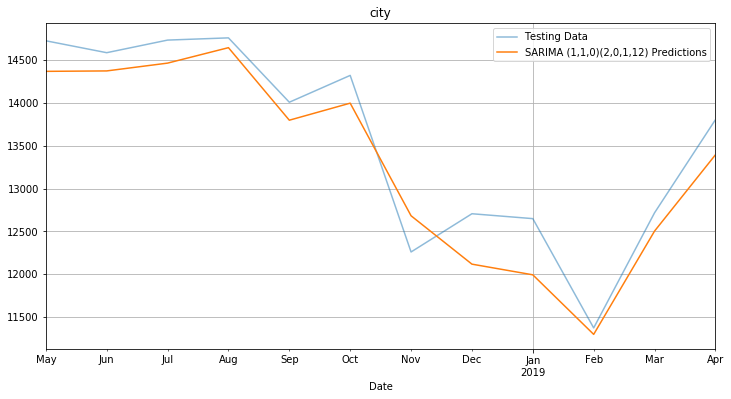

In [26]:
test['city'].plot(figsize=(12,6),legend=True,alpha=0.5,label='Testing Data')
preds.plot(legend=True,alpha=1)
plt.grid(True)
plt.xlabel('Date')
plt.title('city');

### 10. Evaluating the Model <a id='10'></a>

In [28]:
from statsmodels.tools.eval_measures import rmse
error = rmse(test['city'],preds) # Compare it with test.mean()
print('Error: %s\nTest Mean: %s'%(error,test['city'].mean()))

Error: 362.7623542789908
Test Mean: 13552.916666666666


### 11. Forecasting for Future Data <a id='11'></a>

In [29]:
# Refit with all the Data
model = SARIMAX(df['city'],order=(1,1,0),seasonal_order=(1, 0, 1, 12)) # Order is chosen from Pyramid ARIMA
results = model.fit()
results.summary()

/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               city   No. Observations:                  160
Model:             SARIMAX(1, 1, 0)x(1, 0, 1, 12)   Log Likelihood               -1312.610
Date:                            Sun, 19 May 2019   AIC                           2633.221
Time:                                    23:01:10   BIC                           2645.496
Sample:                                01-31-2006   HQIC                          2638.206
                                     - 04-30-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2750      0.037     -7.357      0.000      -0.348      -0.202
ar.S.L12       0.9433      0.026     35.602      0.000       0.891       0.995
ma.S.L12      -0.7448      0.061    -12.166      0.000      -0.865      -0.625
sigma2      6.645e+05   6.73e+04      9.876      0.000    5.33e+05    7.96e+05
===================================================================================
Ljung-Box (Q):                       70.83   Jarque-Bera (JB):                37.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

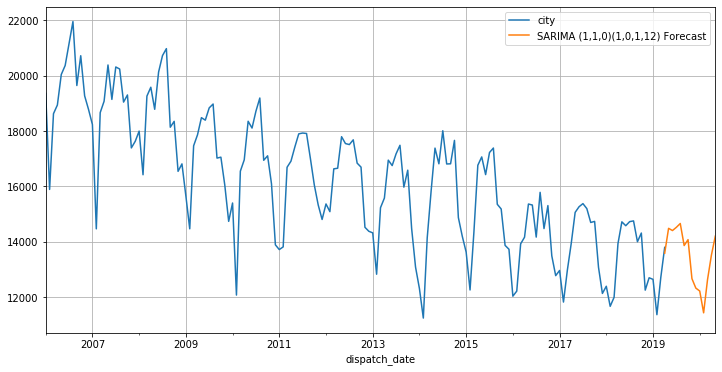

In [30]:
# Forecasting
start = len(df) - 1 
end = len(df) + 12
# typ= 'levels' to return the differenced values to the original units
forecasted_values = results.predict(start=start,end=end,typ='levels').rename('SARIMA (1,1,0)(1,0,1,12) Forecast')
# Plotting
df['city'].plot(figsize=(12,6),legend=True)
forecasted_values.plot(legend=True)
plt.grid(True);

In [31]:
forecasted_values

2019-04-30    13592.800264
2019-05-31    14490.090565
2019-06-30    14410.414919
2019-07-31    14526.959008
2019-08-31    14664.534329
2019-09-30    13869.142986
2019-10-31    14081.806123
2019-11-30    12674.090499
2019-12-31    12333.330828
2020-01-31    12227.538478
2020-02-29    11441.464279
2020-03-31    12634.923820
2020-04-30    13522.998249
2020-05-31    14208.632890
Freq: M, Name: SARIMA (1,1,0)(1,0,1,12) Forecast, dtype: float64